# Fashion mnist using simple sequential

In [32]:
import tensorflow.compat.v2 as tf

import matplotlib.pyplot as plt
import numpy as np

tf.enable_v2_behavior()

In [49]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
num_classes = 10
input_shape = (28,28)

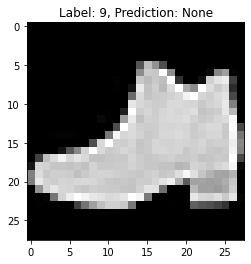

In [34]:
def show_img(x, y, prediction=None):
    plt.imshow(x, cmap='gray')
    plt.title(f"Label: {y}, Prediction: {prediction}")

idx = 15
show_img(x_train[idx], y_train[idx])

In [35]:
# shuffle dataset
shuffler = np.random.permutation(len(x_train))
x_train = x_train[shuffler]
y_train = y_train[shuffler]

# normalize images
x_train = x_train / 255.

In [36]:
# shuffle dataset
shuffler = np.random.permutation(len(x_test))
x_test = x_test[shuffler]
y_test = y_test[shuffler]

# normalize images
x_test = x_test / 255.

In [37]:
# note, our objects are `one-hot` which means objects can belong to only one class
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
batch_size=128
epochs=6

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
)

Epoch 1/6
422/422 [==============================] - 1s 2ms/step - loss: 0.5651 - sparse_categorical_accuracy: 0.8029 - val_loss: 0.4572 - val_sparse_categorical_accuracy: 0.8325
Epoch 2/6
422/422 [==============================] - 1s 2ms/step - loss: 0.4062 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.3750 - val_sparse_categorical_accuracy: 0.8665
Epoch 3/6
422/422 [==============================] - 1s 2ms/step - loss: 0.3628 - sparse_categorical_accuracy: 0.8708 - val_loss: 0.3725 - val_sparse_categorical_accuracy: 0.8632
Epoch 4/6
422/422 [==============================] - 1s 2ms/step - loss: 0.3392 - sparse_categorical_accuracy: 0.8791 - val_loss: 0.3642 - val_sparse_categorical_accuracy: 0.8680
Epoch 5/6
422/422 [==============================] - 1s 2ms/step - loss: 0.3190 - sparse_categorical_accuracy: 0.8849 - val_loss: 0.3451 - val_sparse_categorical_accuracy: 0.8750
Epoch 6/6
422/422 [==============================] - 1s 2ms/step - loss: 0.3054 - sparse_categorical_accu

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.37195026874542236
Test accuracy: 0.8651999831199646


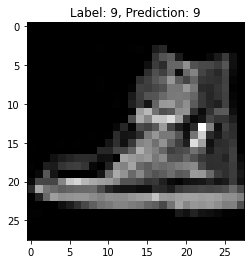

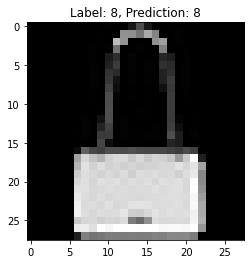

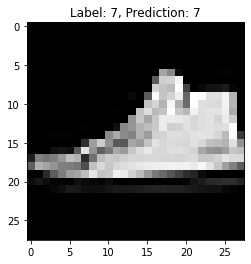

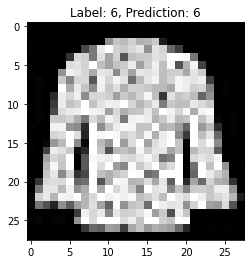

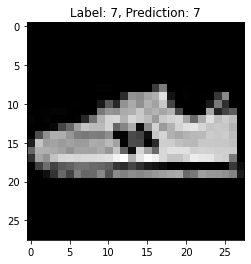

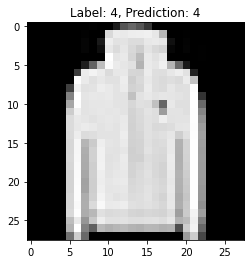

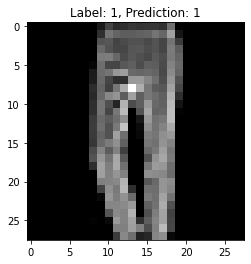

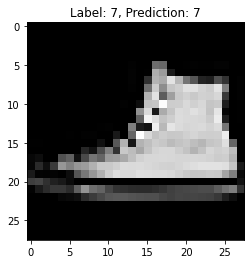

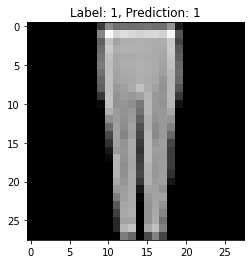

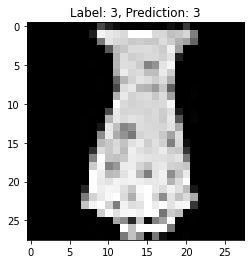

In [40]:
indices = [i for i, x in enumerate(x_test) if i % 1000 == 0]
x = x_test[indices]
y = y_test[indices]

predictions = model.predict(x)
predictions = np.argmax(predictions, axis=1)

for i, pred in enumerate(predictions):
    plt.figure()
    show_img(x[i],y[i],pred)    

### Convolutional Neural Network

In [60]:
x_train = np.expand_dims(x_train, -1)
y_train = keras.utils.to_categorical(y_train, num_classes)

x_test = np.expand_dims(x_test, -1)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [67]:
input_shape = (28,28,1)
conv_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax'),
    ]
)

conv_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [68]:
batch_size = 128
epochs = 15

conv_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
conv_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 16s 39ms/step - loss: 1.0402 - accuracy: 0.7817 - val_loss: 0.4567 - val_accuracy: 0.8367
Epoch 2/15
422/422 [==============================] - 16s 38ms/step - loss: 0.3943 - accuracy: 0.8588 - val_loss: 0.4029 - val_accuracy: 0.8548
Epoch 3/15
422/422 [==============================] - 16s 38ms/step - loss: 0.3401 - accuracy: 0.8787 - val_loss: 0.3628 - val_accuracy: 0.8715
Epoch 4/15
422/422 [==============================] - 16s 39ms/step - loss: 0.3053 - accuracy: 0.8900 - val_loss: 0.3482 - val_accuracy: 0.8748
Epoch 5/15
422/422 [==============================] - 16s 39ms/step - loss: 0.2856 - accuracy: 0.8962 - val_loss: 0.3281 - val_accuracy: 0.8835
Epoch 6/15
422/422 [==============================] - 16s 38ms/step - loss: 0.2685 - accuracy: 0.9031 - val_loss: 0.3197 - val_accuracy: 0.8827
Epoch 7/15
422/422 [==============================] - 16s 37ms/step - loss: 0.2561 - accuracy: 0.9066 - val_loss: 0.3242 - val_accuracy:

In [69]:
score = conv_model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.4156147837638855
Test accuracy: 0.8809999823570251


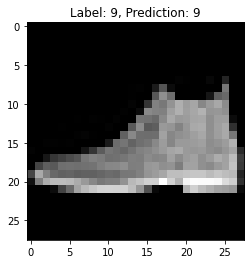

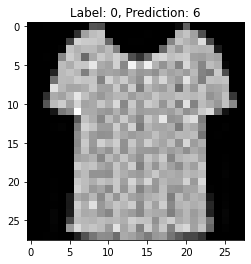

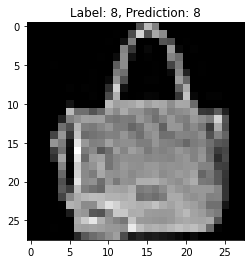

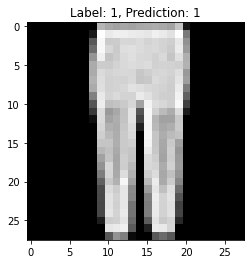

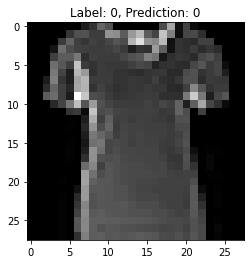

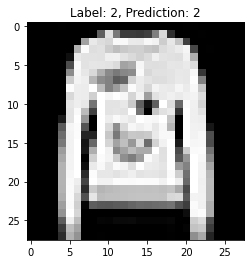

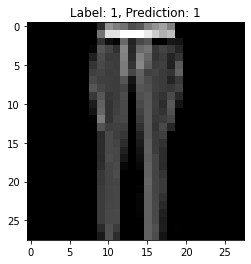

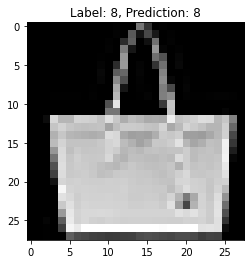

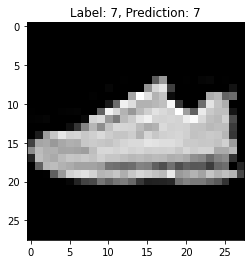

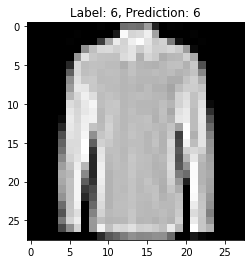

In [66]:
indices = [i for i, x in enumerate(x_test) if i % 1000 == 0]
x = x_test[indices]
y = y_test[indices]

predictions = conv_model.predict(x)
predictions = np.argmax(predictions, axis=1)

for i, pred in enumerate(predictions):
    plt.figure()
    show_img(x[i].reshape(28,28),np.argmax(y[i]),pred)